# Pseudo-bayesian method

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_pseudo_bayesian import NewMethod
import sys
import os

In [2]:
# A test for new methods
# np.random.seed(0) 

# signal parameters
SNRin = 0
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_mc_dumped_cos()
# s = sbank.signal_mc_crossing_chirps()
s = sbank.signal_mc_synthetic_mixture_5()

signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:0.0


In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(s, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# xr = pb_method(x, Ncomp, use_sst, ds, beta, alpha, div, Pnei, PneiMask)
use_sst = False
ds = []
beta = []
alpha = [] 
div = 4
Pnei = 35
PneiMask = 20
M = N
L = 20
# signal_output = funa(signal, [], use_sst, ds, beta, alpha, div, Pnei, PneiMask, M, L )
signal_output = funa(signal,[],False,[],[],[])
print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

5.125305148765099


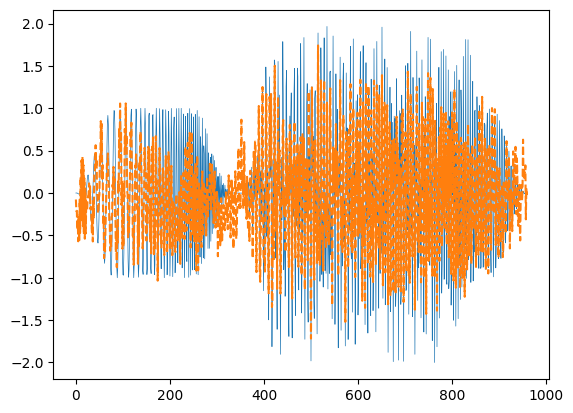

In [4]:
S_output, F_output = get_spectrogram(signal_output, window = g)
F_output = F_output[0:N+1]

plt.figure()
plt.plot(s[tmin:tmax], linewidth=0.5)
plt.plot(signal_output[tmin:tmax],'--')

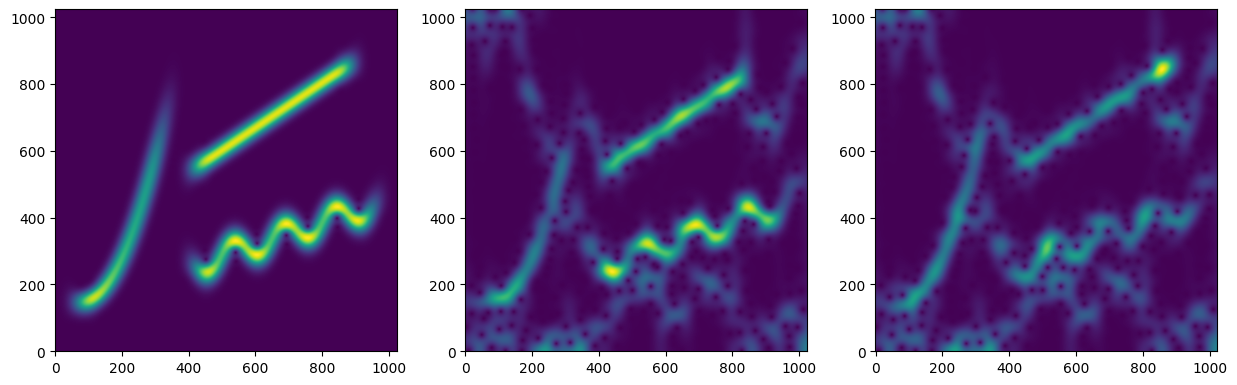

In [5]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
# ax[0].grid(True)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
# ax[1].grid(True)
ax[2].imshow(abs(F-F_output), origin='lower')#, cmap=cmocean.cm.deep)
# ax[1].grid(True)
plt.show()


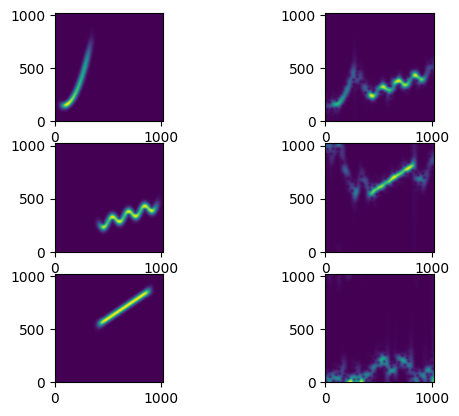

In [6]:
signal_output = funa(signal, [], [], [], [], [], [], [], [], [], [], True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

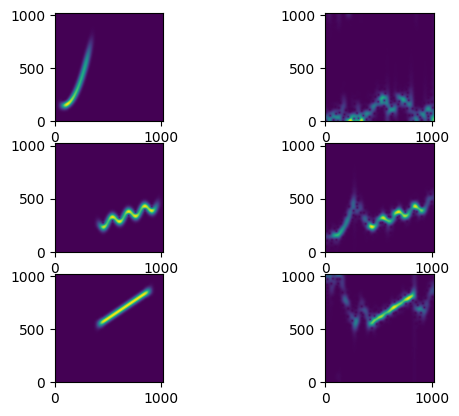

In [7]:
from benchmark_demo.perf_metrics import order_components, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

3


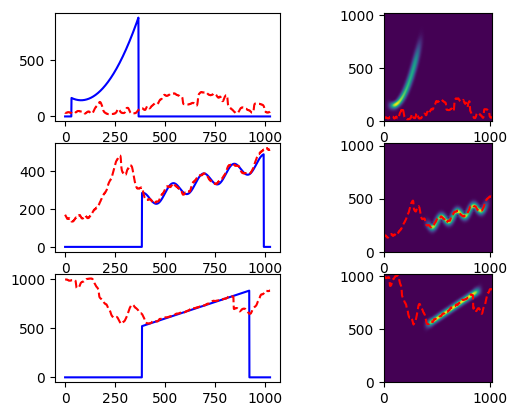

In [8]:
signal_output = funa(signal, [], [], [], [], [], [], [], [], [], [], [],True)
order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')

print(len(signal.instf))